In [1]:
import os
import torch
from micro_sam.automatic_segmentation import get_predictor_and_segmenter, automatic_instance_segmentation
from tnia.plotting.plt_helper import random_label_cmap, imshow_multi2d

c:\Users\bnort\miniconda3\envs\microsam_cellpose\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
tile_shape = None #(384, 384)
halo = (64, 64)
model_type = "vit_b_lm"

device = "cuda" if torch.cuda.is_available() else "cpu" # the device/GPU used for training
# Step 1: Get the 'predictor' and 'segmenter' to perform automatic instance segmentation.
predictor, segmenter = get_predictor_and_segmenter(
    model_type=model_type, # choice of the Segment Anything model
    #checkpoint=best_checkpoint,  # overwrite to pass your own finetuned model.
    device=device,  # the device to run the model inference.
    is_tiled = False #(tile_shape is not None),  # whether the model is tiled or not.
)

In [4]:
from skimage.io import imread

#image = imread('tough_cellpose.tif')
#image = imread('cell_00260.tif'

image_path = r"D:\images\tnia-python-images\imagesc\2024_03_27_SOTA_segmentation\images\cell_00068.bmp"
#image_path = r"C:\Users\bnort\work\ImageJ2022\tnia\notebooks-and-napari-widgets-for-dl\data\ladybugs_series\16746885_25273748.jpg"  # Replace with your image path
image = imread(image_path)

image.shape

(1536, 2040, 3)

In [5]:

# Step 2: Get the instance segmentation for the given image.
prediction = automatic_instance_segmentation(
    predictor=predictor,  # the predictor for the Segment Anything model.
    segmenter=segmenter,  # the segmenter class responsible for generating predictions.
    input_path=image,
    ndim=2,
    #tile_shape=tile_shape,
    #halo=halo,
)


Initialize instance segmentation with decoder: 100%|██████████| 1/1 [00:00<00:00,  3.18it/s]


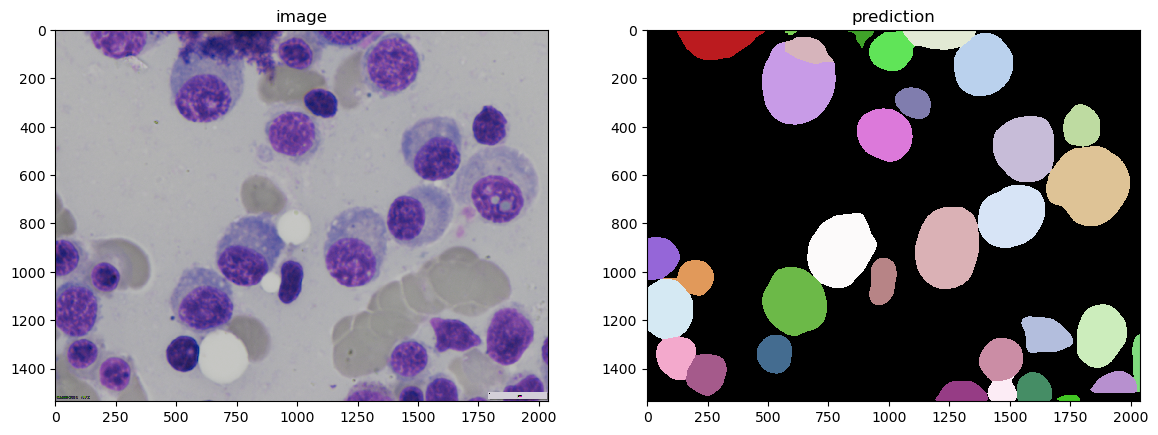

In [6]:
fig = imshow_multi2d([image, prediction], ['image', 'prediction'], 1, 2, 14, 7, colormaps=['gray', random_label_cmap()])